In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import pickle

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

In [2]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

Do the background mutations we observe drastically affect the fitness and performances of mutants?

In [3]:
# load previously save dictinoary of preexisting mutations

with open(f'{home_dir}/data/intermediate/preexisting_mutations.pkl', 'rb') as f:
    preexisting_mutations = pickle.load(f)
    

for ancestor,mutations in preexisting_mutations.items():
    condensed_mutations = []
    preambles = []
    for mutation in mutations:
        if ':'.join(mutation.split(':')[:5]) not in preambles:
            condensed_mutations.append(mutation)
            preambles.append(':'.join(mutation.split(':')[:5]))
  
    preexisting_mutations[ancestor] = condensed_mutations
            
    
    

In [4]:
':'.join(mutation.split(':')[:5])

'X:179445:C:A:PBS2'

In [5]:
preexisting_mutations

{'IRA1_NON': ['II:522427:A:T:IRA1:stop_gained:c.4202T>A:p.Leu1401*',
  'VI:101127:T:A:LPD1:downstream_gene_variant:c.*501A>T:nan',
  'VII:1023358:C:A:YGR266W:missense_variant:c.703C>A:p.Gln235Lys',
  'VII:161471:G:C:ATG1:missense_variant:c.1407G>C:p.Leu469Phe',
  'XII:1029498:C:A:RPL6B:synonymous_variant:c.261C>A:p.Thr87Thr',
  'XIV:204739:G:A:KEX2:missense_variant:c.2312G>A:p.Ser771Asn',
  'XIV:218512:G:A:ELA1:synonymous_variant:c.151C>T:p.Leu51Leu',
  'XV:608680:G:T:SPP2:missense_variant:c.518C>A:p.Thr173Lys',
  'XV:818647:T:G:RPT4:upstream_gene_variant:c.-4939A>C:nan'],
 'IRA1_MIS': ['II:522697:G:A:IRA1:missense_variant:c.3932C>T:p.Ala1311Val',
  'V:177308:C:A:YER010C:upstream_gene_variant:c.-3970G>T:nan',
  'V:303524:AT:ATT:TDA2:upstream_gene_variant:c.-1199_-1198insA:nan',
  'XI:347074:C:T:YKL050C:upstream_gene_variant:c.-1454G>A:nan',
  'XIV:631356:ACACAAAAGTATTTTTGGTCTAGCGGGGGTCATACTTTTCATTTCCGGGCGGCTGCGGCGGAAAAAAACGTGACGCCTTTTAG:A:CIT1:upstream_gene_variant:c.-377_-296delCTAAAA

In [6]:
tools.ancestral_mutations

{'IRA1_NON': 'II:522427:A:T:IRA1:stop_gained:c.4202T>A:p.Leu1401*',
 'IRA1_MIS': 'II:522697:G:A:IRA1:missense_variant:c.3932C>T:p.Ala1311Val',
 'CYR1': 'X:427906:C:A:CYR1:missense_variant:c.2750C>A:p.Ser917Tyr',
 'GPB2': 'I:40104:T:G:GPB2:stop_gained:c.846T>G:p.Tyr282*',
 'TOR1': 'X:564551:T:G:TOR1:missense_variant:c.5136T>G:p.Phe1712Leu'}

/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_66105/3995284163.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,4))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, a

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees 

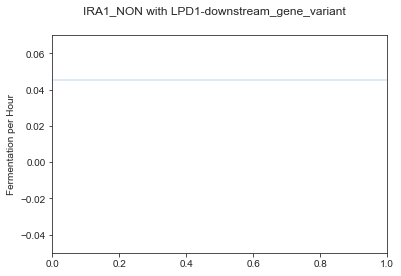

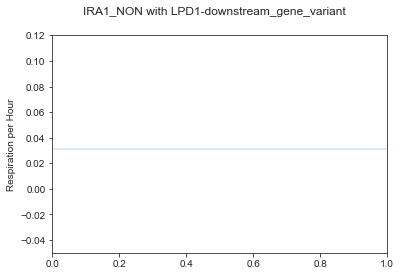

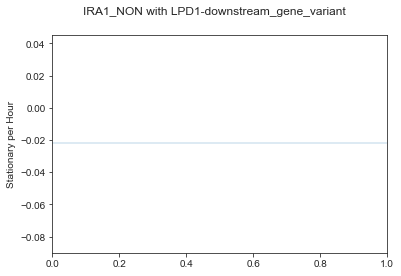

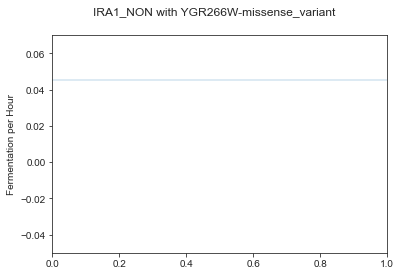

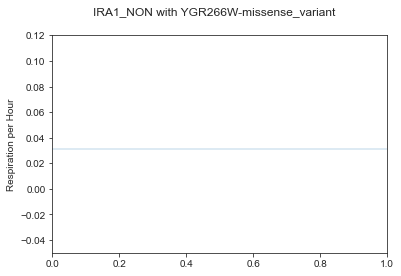

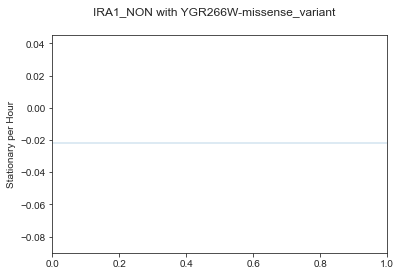

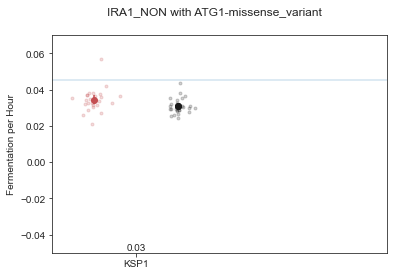

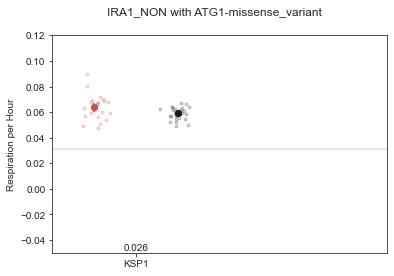

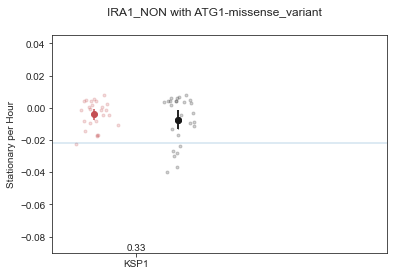

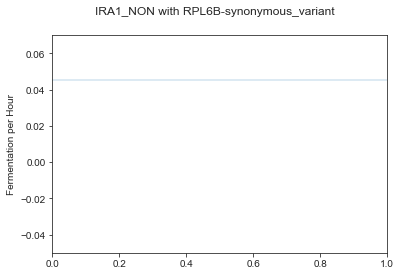

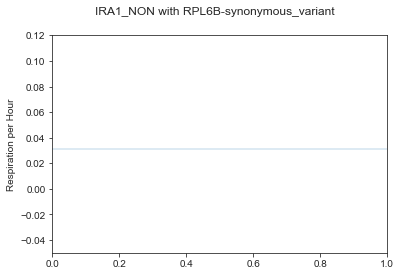

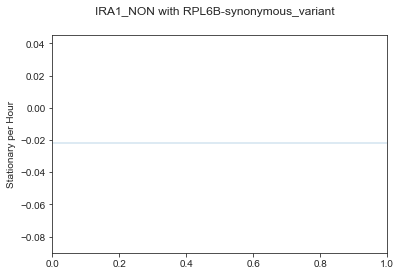

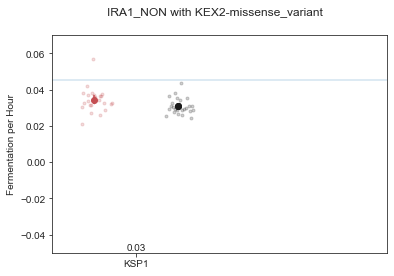

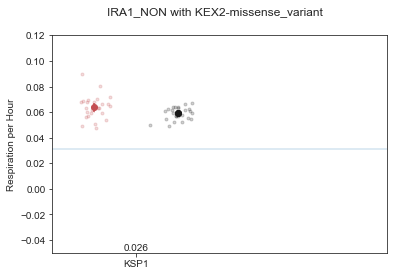

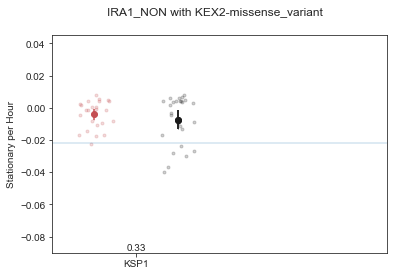

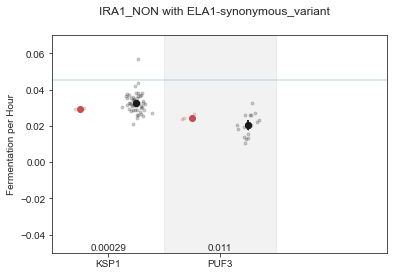

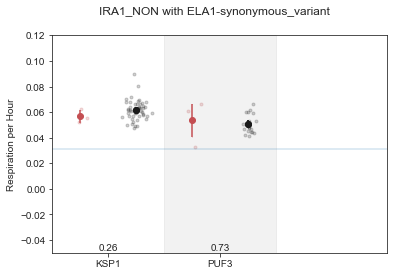

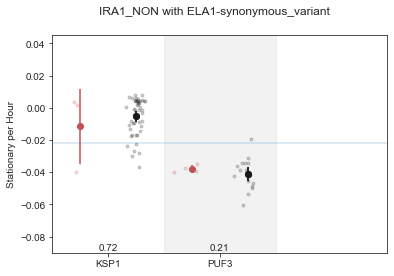

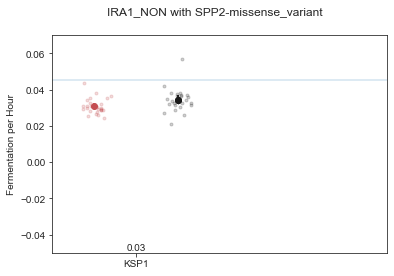

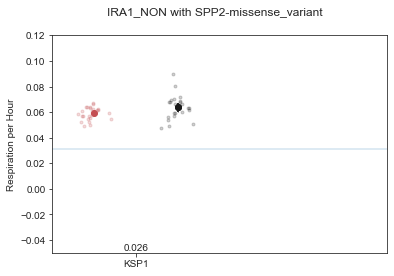

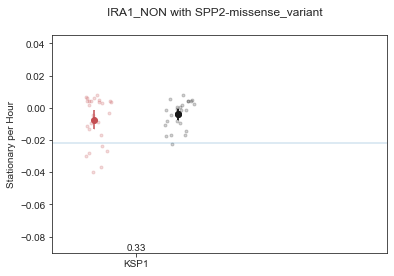

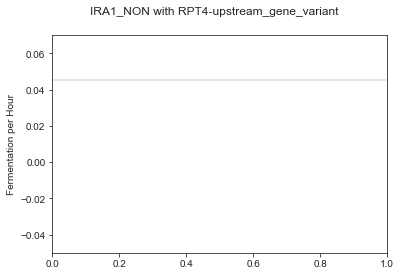

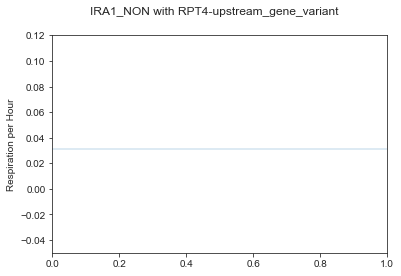

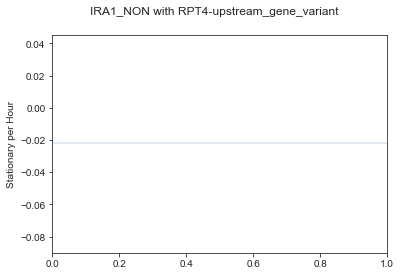

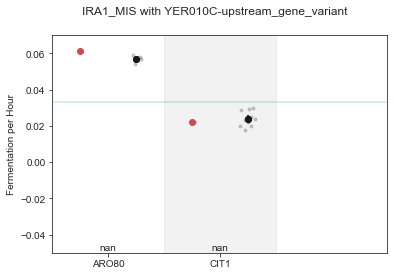

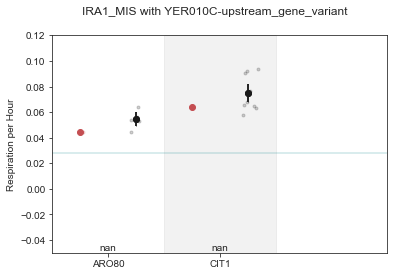

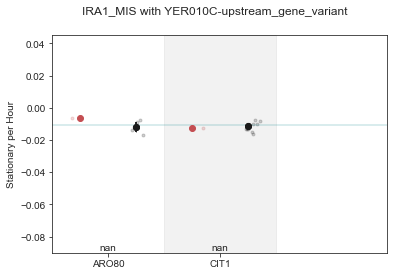

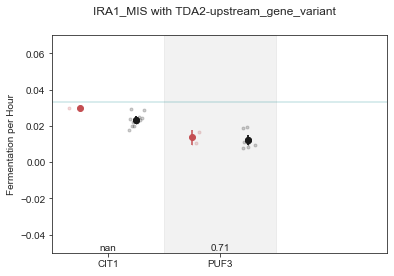

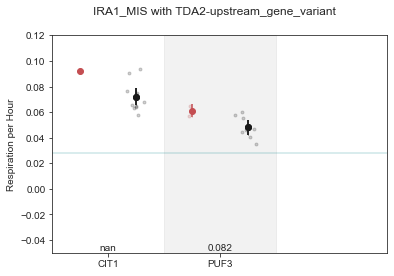

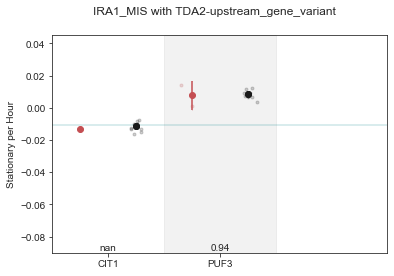

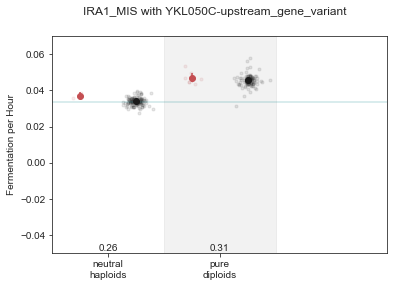

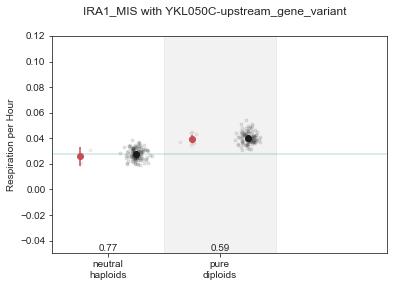

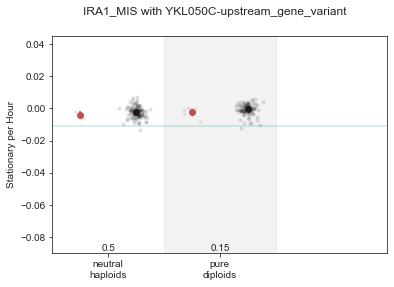

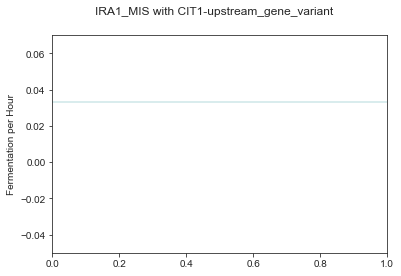

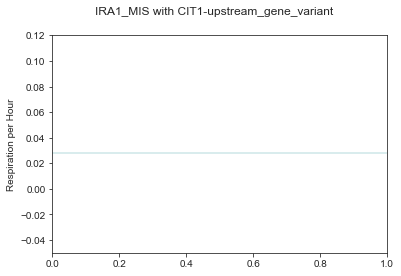

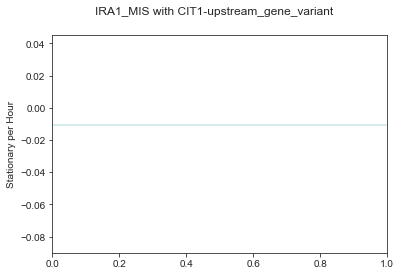

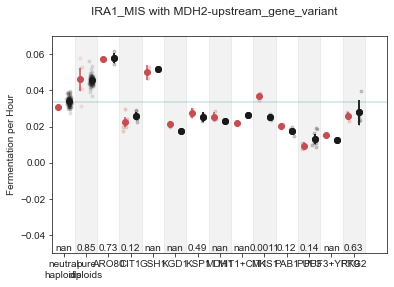

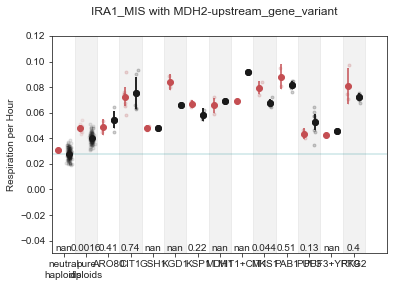

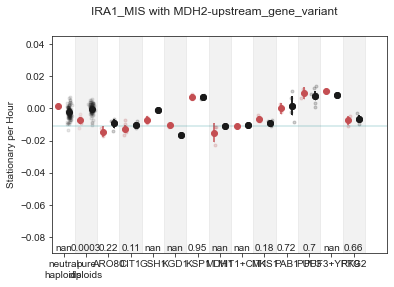

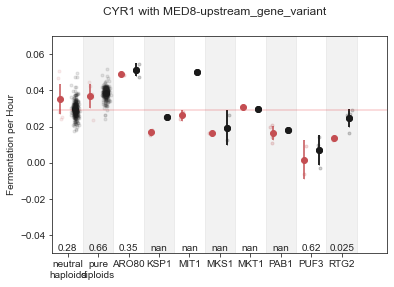

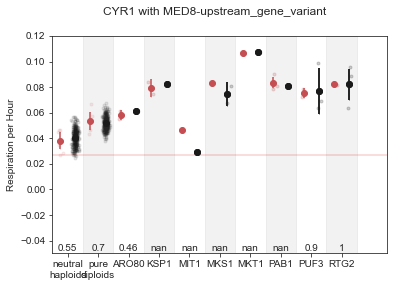

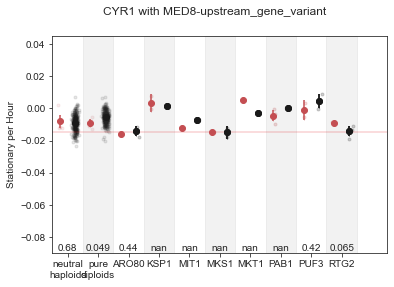

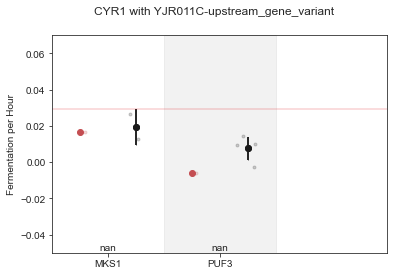

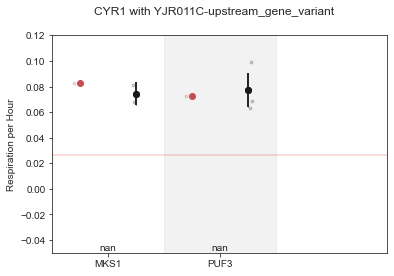

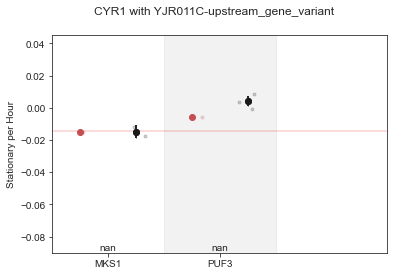

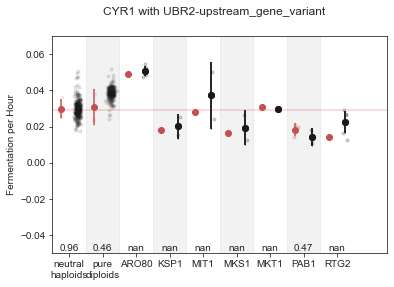

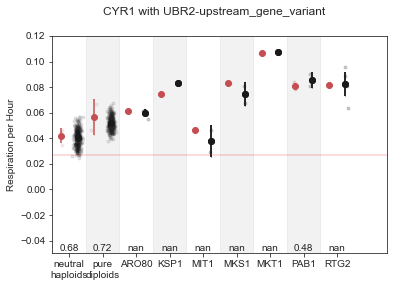

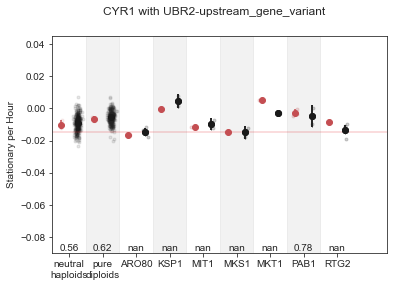

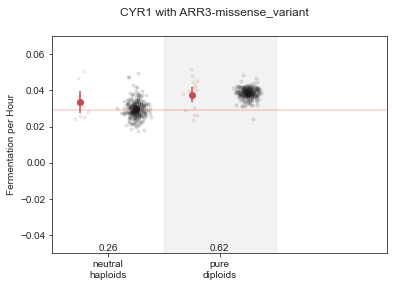

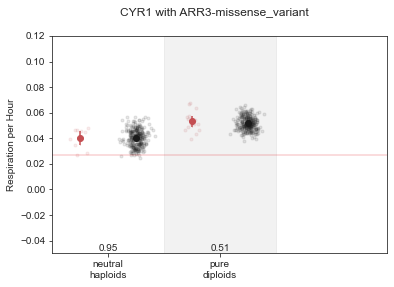

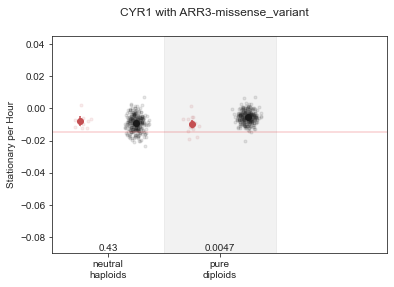

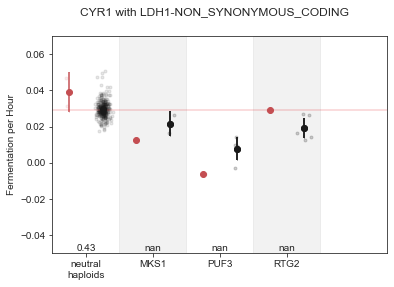

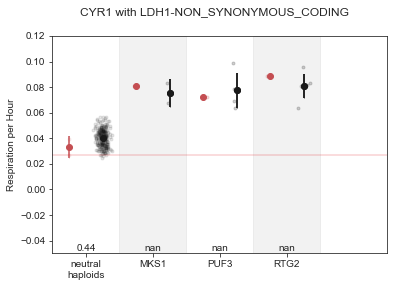

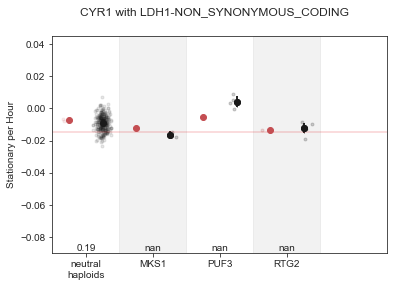

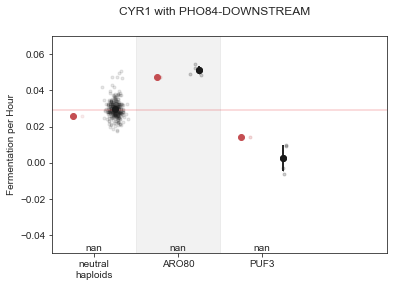

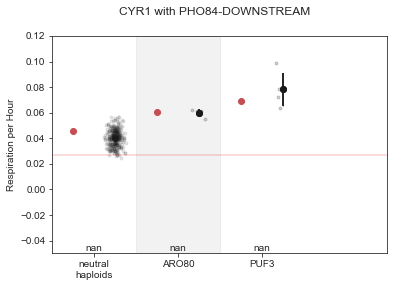

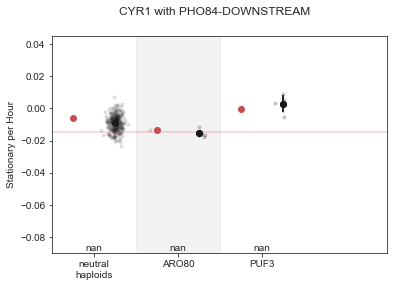

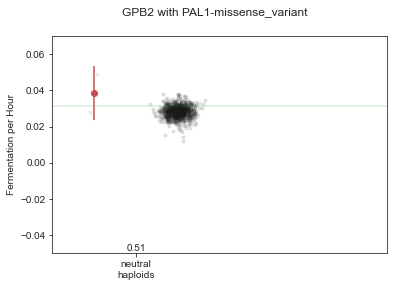

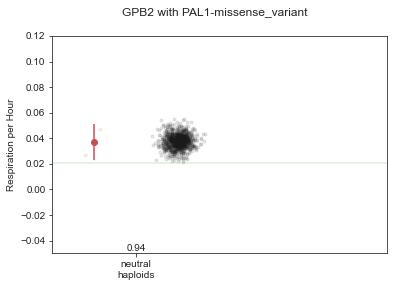

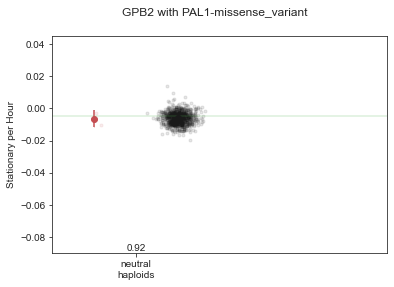

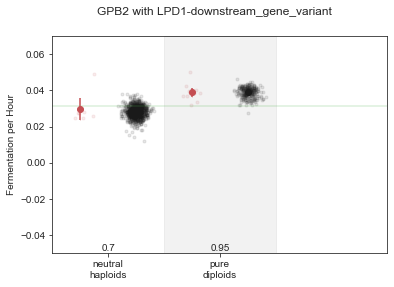

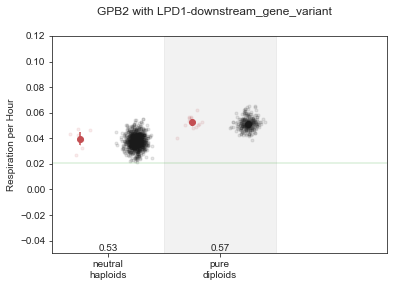

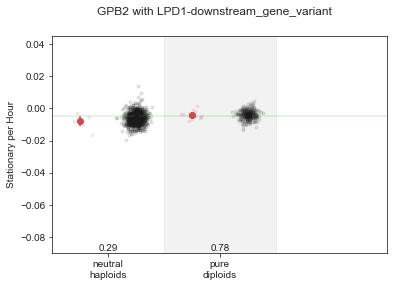

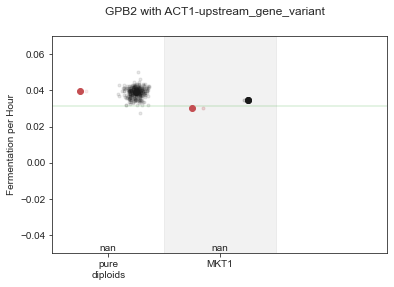

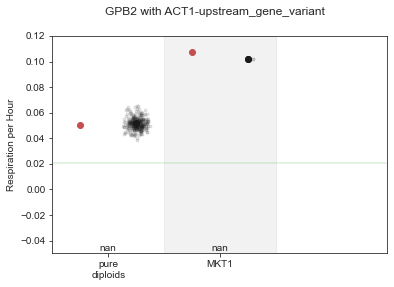

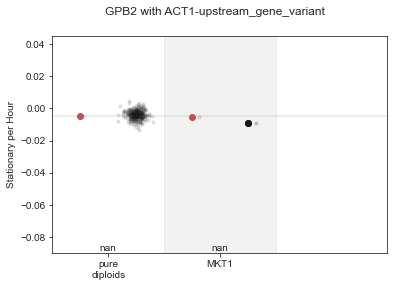

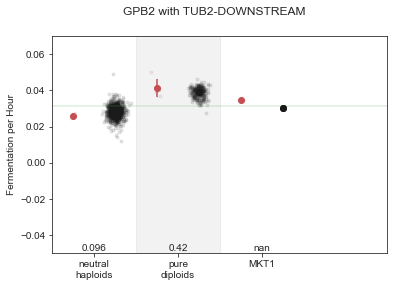

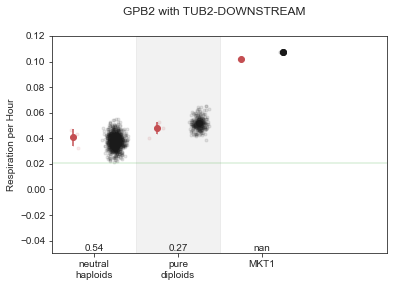

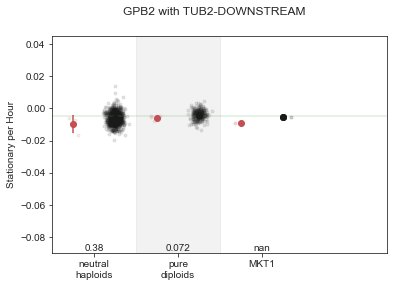

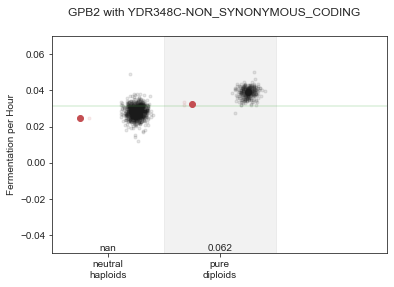

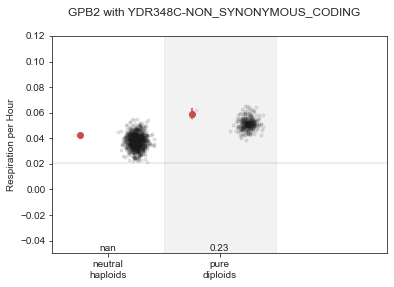

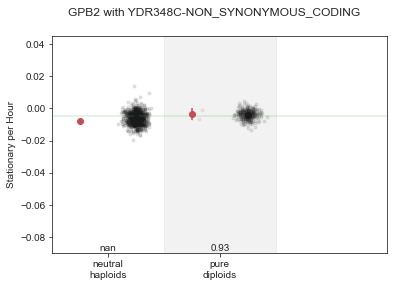

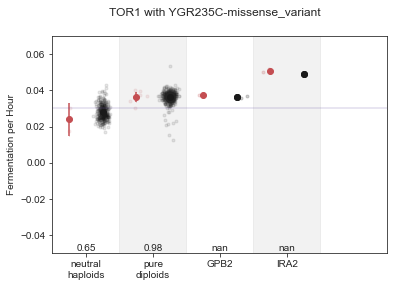

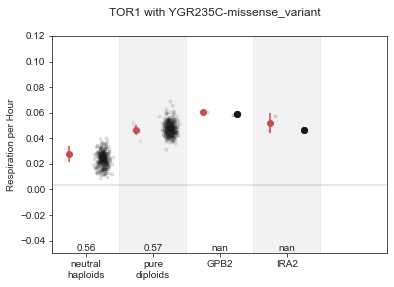

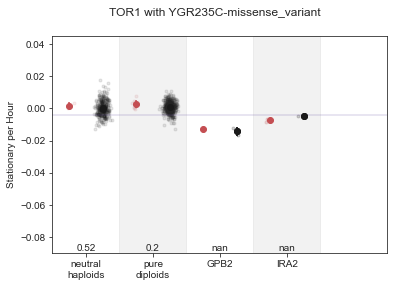

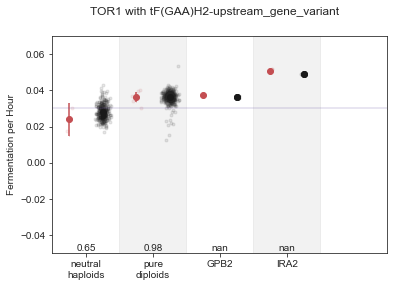

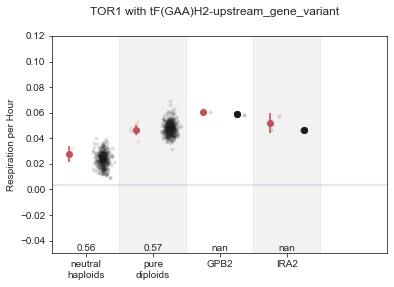

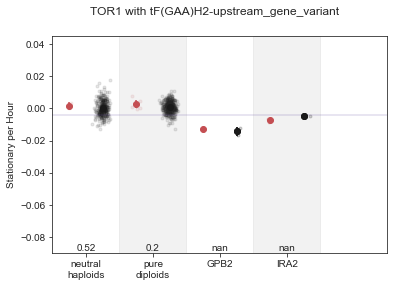

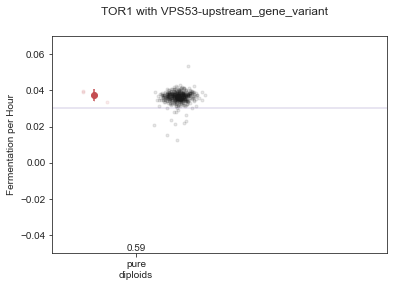

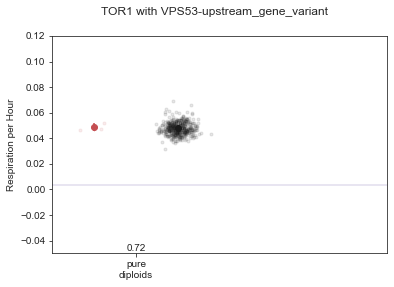

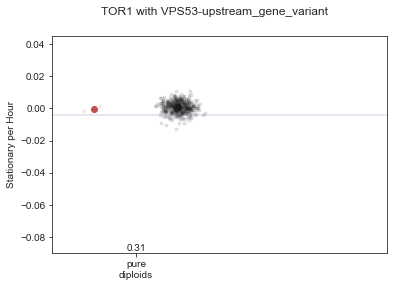

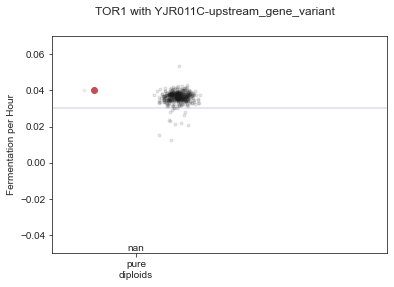

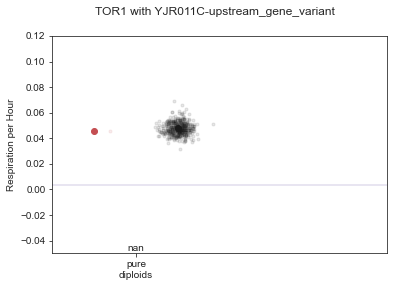

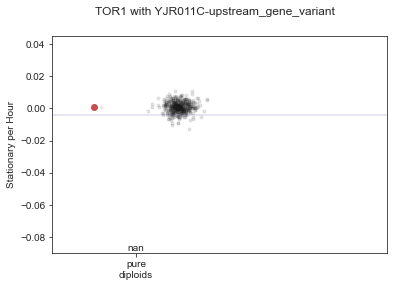

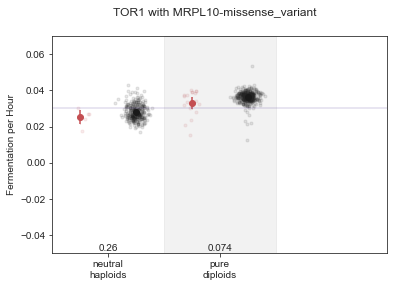

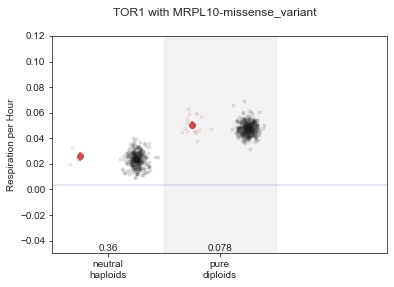

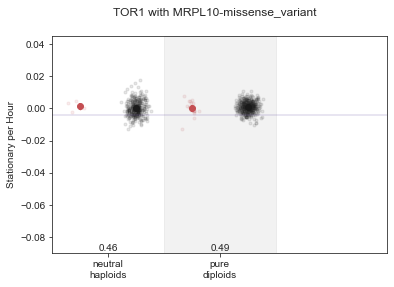

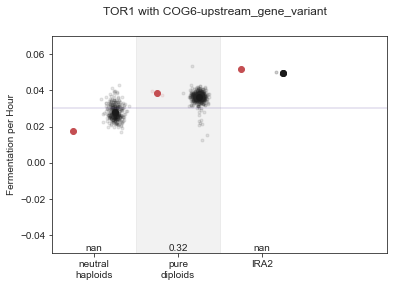

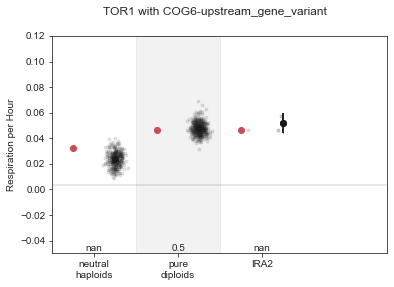

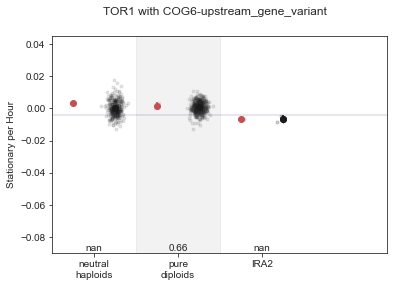

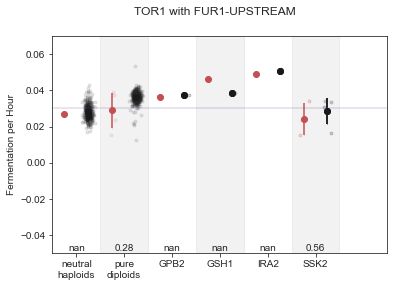

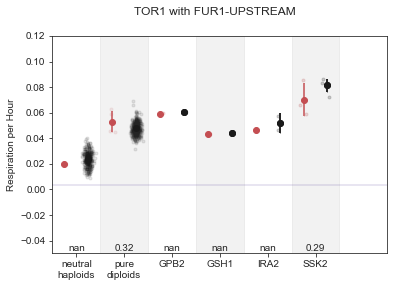

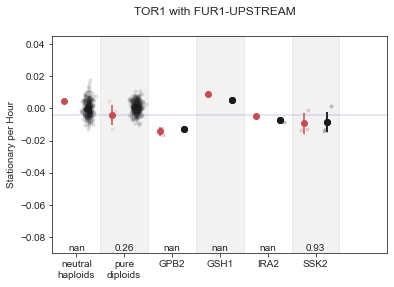

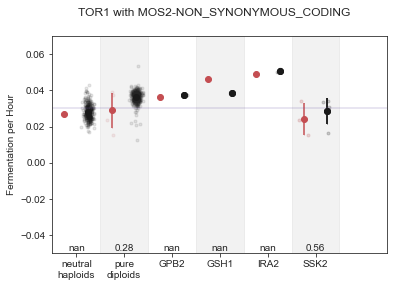

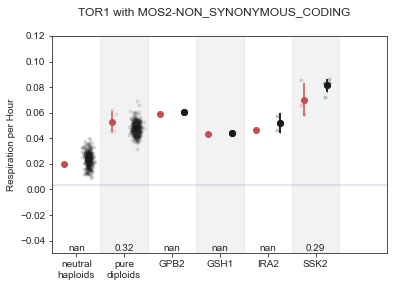

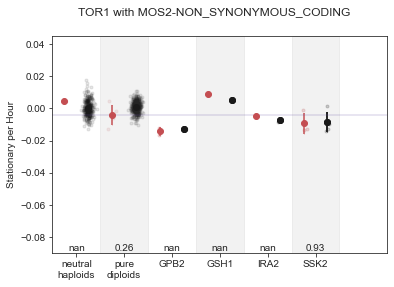

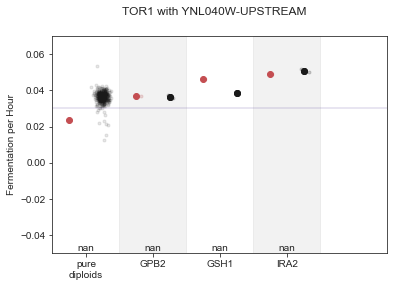

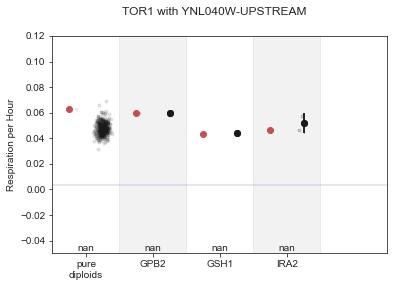

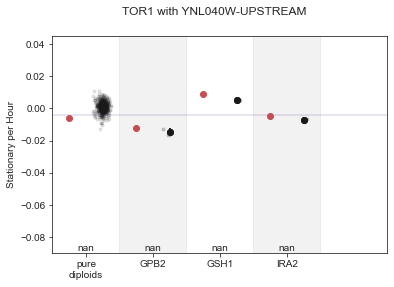

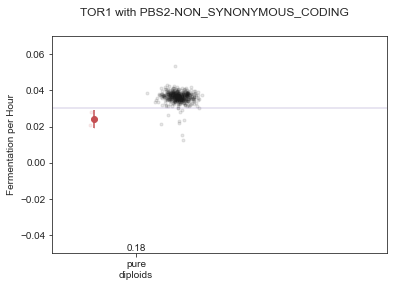

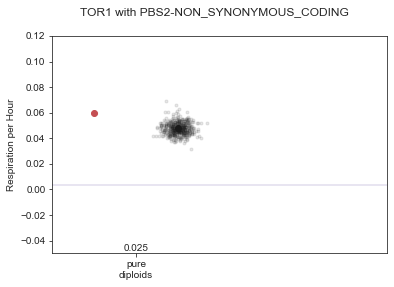

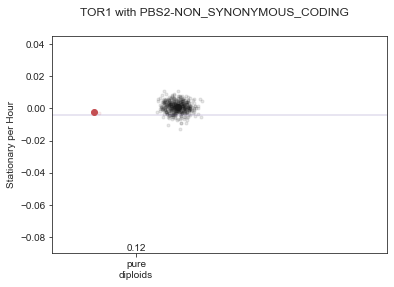

In [7]:
labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}

for ancestor in tools.ancestral_mutations.keys():
    
    this_anc = merged_fitness[merged_fitness['ancestor']==ancestor]
    
    for background_mutation in preexisting_mutations[ancestor]:
        if background_mutation != tools.ancestral_mutations[ancestor]:
            this_background_barcodes  = []
            
            background_gene = background_mutation.split(':')[4]
            background_effect = background_mutation.split(':')[5]
            

            
            for bc,verbose in zip(this_anc['barcode'].values,this_anc['all_mutations_verbose'].values):
                if not p.isnull(verbose):
#                     print(verbose)
                    for variant in verbose.split('~'):
                        if ':'.join(background_mutation.split(':')[:5])  in variant:
                            this_background_barcodes.append(bc)
                            break
                        
            this_background = this_anc[this_anc['barcode'].isin(this_background_barcodes)]
            
            not_this_background = this_anc[~this_anc['barcode'].isin(this_background_barcodes)]
            
            for count,data in enumerate(['FerPerHour','ResPerHour','StaPerHour']): 
                
                plt.figure(figsize=(6,4))
                plt.suptitle(f'{ancestor} with {background_gene}-{background_effect}')
                plt.ylabel(labels[data])
                plt.ylim(lims[data][0],lims[data][1])
                
                counter = 0
                tick_labels = []
                
                for this_class in ['neutral_haploids','pure_diploids']:
                    if len(this_background[this_background['class_new']==this_class]) > 0 and len(not_this_background[not_this_background['class_new']==this_class]) > 0:
                    
#                         background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancestor]]
#                         plt.scatter(counter,background_mutant[data].values,
#                                 marker='+',color=tools.anc_color_map[ancestor],s=100)

                        plt.scatter([tools.jitter_point(counter-0.25,0.05) for x in this_background[this_background['class_new']==this_class][data].values],
                                    this_background[this_background['class_new']==this_class][data].values,
                                    alpha=0.1,color='r',marker='.')

                        plt.errorbar(x=counter-0.25,y=np.mean(this_background[this_background['class_new']==this_class][data].values),
                                     yerr=2*tools.standard_error(this_background[this_background['class_new']==this_class][data].values),
                                    color='r',marker='o',capsize=0.1)

                        plt.scatter([tools.jitter_point(counter+0.25,0.05) for x in not_this_background[not_this_background['class_new']==this_class][data].values],
                                    not_this_background[not_this_background['class_new']==this_class][data].values,
                                    alpha=0.1,color='k',marker='.')
            
                        plt.errorbar(x=counter+0.25,y=np.mean(not_this_background[not_this_background['class_new']==this_class][data].values),
                                    yerr=2*tools.standard_error(not_this_background[not_this_background['class_new']==this_class][data].values),
                                    color='k',marker='o',capsize=0.1)
                        
                        stat,pval = scipy.stats.ttest_ind(this_background[this_background['class_new']==this_class][data].values,
                                              not_this_background[not_this_background['class_new']==this_class][data].values,
                                             equal_var=False)
                        
                        plt.text(x=counter,y=lims[data][0],s=f'{pval:.2g}',va='bottom',ha='center')
                        
                        if (counter % 2) == 1:
                            plt.axvspan(counter-0.5,counter+0.5,color='gray',alpha=0.1)
                        
                        tick_labels.append(this_class.replace('_','\n'))
                        counter +=1 

            
                for gene in np.unique([gene for gene in this_background['gene'].values if not p.isnull(gene)]):
                    if gene in not_this_background['gene'].values:
                    



                        plt.scatter([tools.jitter_point(counter-0.25,0.05) for x in this_background[this_background['gene']==gene][data].values],
                                    this_background[this_background['gene']==gene][data].values,
                                    alpha=0.2,color='r',marker='.')
                        
                        plt.errorbar(x=counter-0.25,y=np.mean(this_background[this_background['gene']==gene][data].values),
                                     yerr=2*tools.standard_error(this_background[this_background['gene']==gene][data].values),
                                    color='r',marker='o',capsize=0.1)

                        plt.scatter([tools.jitter_point(counter+0.25,0.05) for x in not_this_background[not_this_background['gene']==gene][data].values],
                                    not_this_background[not_this_background['gene']==gene][data].values,
                                    alpha=0.2,color='k',marker='.')
                        
                        plt.errorbar(x=counter+0.25,y=np.mean(not_this_background[not_this_background['gene']==gene][data].values),
                                     yerr=2*np.std(not_this_background[not_this_background['gene']==gene][data].values)/np.sqrt(len(not_this_background[not_this_background['gene']==gene][data].values)),
                                    color='k',marker='o',capsize=0.1)
                        
                        plt.errorbar(x=counter+0.25,y=np.mean(not_this_background[not_this_background['gene']==gene][data].values),
                                     yerr=2*tools.standard_error(not_this_background[not_this_background['gene']==gene][data].values),
                                    color='k',marker='o',capsize=0.1)




                        
                        stat,pval = scipy.stats.ttest_ind(this_background[this_background['gene']==gene][data].values,
                                              not_this_background[not_this_background['gene']==gene][data].values,
                                             equal_var=False)
                        
                        plt.text(x=counter,y=lims[data][0],s=f'{pval:.2g}',va='bottom',ha='center')

                        
                        if (counter % 2) == 1:
                            plt.axvspan(counter-0.5,counter+0.5,color='gray',alpha=0.1)
                        
                        tick_labels.append(gene)
                        counter +=1 
                        
                
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancestor]]
                plt.axhline(background_mutant[data].values[0],color=tools.anc_color_map[ancestor],alpha=0.2)
                
                
                if counter > 0:
                    plt.xlim(-0.5,counter+0.5)
                    plt.xticks(range(len(tick_labels)),tick_labels)
                    plt.savefig(f'{home_dir}/figures/analysis/background_mutation/background_mutation_{ancestor}_{background_gene}_{data}.pdf',bbox_inches='tight')


In [8]:


# labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
# lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}



# for ancestor in tools.ancestral_mutations.keys():
    
#     this_anc = merged_fitness[merged_fitness['ancestor']==ancestor]
    
#     for background_mutation in preexisting_mutations[ancestor]:
#         if background_mutation != tools.ancestral_mutations[ancestor]:
#             this_background_barcodes  = []
            
#             background_gene = background_mutation.split(':')[4]
#             background_effect = background_mutation.split(':')[5]
            

            
#             for bc,verbose in zip(this_anc['barcode'].values,this_anc['all_mutations_verbose'].values):
#                 if not p.isnull(verbose):
# #                     print(verbose)
#                     for variant in verbose.split('~'):
#                         if ':'.join(background_mutation.split(':')[:5])  in variant:
#                             this_background_barcodes.append(bc)
#                             break
                        
#             this_background = this_anc[this_anc['barcode'].isin(this_background_barcodes)]
            
#             not_this_background = this_anc[~this_anc['barcode'].isin(this_background_barcodes)]
            
            
#             for this_class in ['neutral_haploids','pure_diploids']:
#                 plt.figure(figsize=(12,4))
#                 plt.suptitle(f'{ancestor} {this_class}')
#                 for count,(xdata,ydata) in enumerate(combinations(['FerPerHour','ResPerHour','StaPerHour'],2)): 
#                     plt.subplot(1,3,count+1)

#                     plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
#                     marker='+',color=tools.anc_color_map[ancestor],s=100)

#                     plt.scatter(this_background[this_background['class_new']==this_class][xdata].values,
#                                 this_background[this_background['class_new']==this_class][ydata].values,
#                                 alpha=0.7,color='r',
#                                 label=f'with {background_gene},{background_effect}')

#                     plt.scatter(not_this_background[not_this_background['class_new']==this_class][xdata].values,
#                                 not_this_background[not_this_background['class_new']==this_class][ydata].values,
#                                 alpha=0.7,color='k',
#                                 label=f'without {background_gene},{background_effect}')


#                     plt.xlim(lims[xdata][0],lims[xdata][1])
#                     plt.ylim(lims[ydata][0],lims[ydata][1])

#                     plt.xlabel(f'Change in {labels[xdata]}')
#                     plt.ylabel(f'Change in {labels[ydata]}')

#                     plt.axhline(color='k',linestyle=':',alpha=0.2)
#                     plt.axvline(color='k',linestyle=':',alpha=0.2)

#                 plt.legend(loc=(1,0))
                
#                 plt.savefig(f'{home_dir}/figures/analysis/background_mutation/background_mutation_{ancestor}_{background_gene}_{this_class}.pdf',bbox_inches='tight')

            
            
#             for gene in np.unique([gene for gene in this_background['gene'].values if not p.isnull(gene)]):
#                 if gene in not_this_background['gene'].values:
                    
#                     plt.figure(figsize=(12,4))
#                     plt.suptitle(f'{ancestor} {gene}')
        
#                     for count,(xdata,ydata) in enumerate(combinations(['FerPerHour','ResPerHour','StaPerHour'],2)): 
#                         plt.subplot(1,3,count+1)
            
#                         background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancestor]]
#                         plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
#                             marker='+',color=tools.anc_color_map[ancestor],s=100)
                          
#                         plt.scatter(this_background[this_background['gene']==gene][xdata].values,
#                                     this_background[this_background['gene']==gene][ydata].values,
#                                     alpha=0.7,color='r',
#                                     label=f'with {background_gene},{background_effect}')
                        
#                         plt.scatter(not_this_background[not_this_background['gene']==gene][xdata].values,
#                                     not_this_background[not_this_background['gene']==gene][ydata].values,
#                                     alpha=0.7,color='k',
#                                     label=f'without {background_gene},{background_effect}')
            
#                         plt.xlim(lims[xdata][0],lims[xdata][1])
#                         plt.ylim(lims[ydata][0],lims[ydata][1])

#                         plt.xlabel(f'Change in {labels[xdata]}')
#                         plt.ylabel(f'Change in {labels[ydata]}')
                
#                         plt.axhline(color='k',linestyle=':',alpha=0.2)
#                         plt.axvline(color='k',linestyle=':',alpha=0.2)
                        
#                     plt.legend(loc=(1,0))

# #                     plt.savefig(f'{home_dir}/figures/analysis/background_mutation/background_mutation_{ancestor}_{background_gene}_{gene}.pdf',bbox_inches='tight')

